# **Penguins Species Prediction Using SVM**


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Penguins dataset
penguins = sns.load_dataset("penguins")
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
# Preprocess the Data
# Drop rows with missing values
penguins = penguins.dropna()

In [4]:
# Select features and target
X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguins['species']  # Target is the species of penguins

In [5]:
# Encode target labels as integers
y = y.astype('category').cat.codes  # Convert species to numerical codes (Adelie=0, Chinstrap=1, Gentoo=2)


In [6]:
# Split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
# Build Train the SVM Classifier
# Using an RBF (Radial Basis Function) kernel
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_model.fit(X_train, y_train)

SVC()

In [8]:
# Predict results using the model
y_pred = svm_model.predict(X_test)

In [9]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Accuracy: 0.76

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.70      0.90      0.79        48
   Chinstrap       0.00      0.00      0.00        18
      Gentoo       0.85      0.97      0.90        34

    accuracy                           0.76       100
   macro avg       0.52      0.62      0.56       100
weighted avg       0.63      0.76      0.69       100



Text(0.5, 1.0, 'Confusion Matrix')

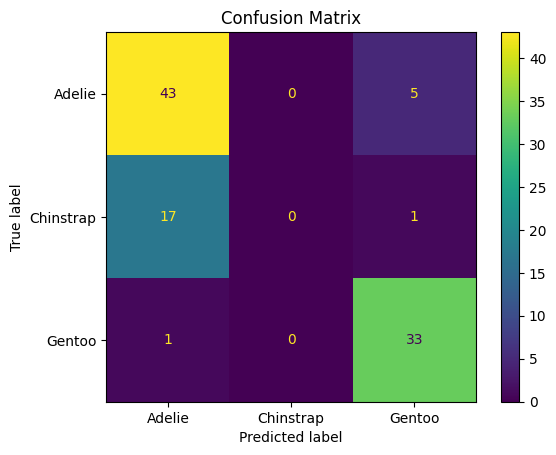

In [10]:
# Evalluate the model
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
plt.title("Confusion Matrix")

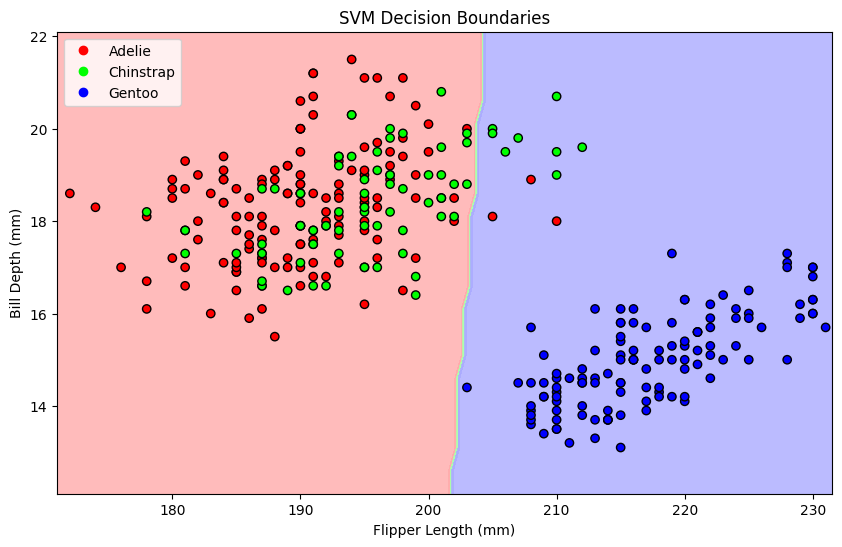

In [11]:
# Visualize Decision Boundaries
# We will use only two features: 'flipper_length_mm' and 'bill_depth_mm' for visualization
from matplotlib.colors import ListedColormap


X_viz = penguins[['flipper_length_mm', 'bill_depth_mm']].to_numpy()
y_viz = y

# Split visualization data
X_viz_train, X_viz_test, y_viz_train, y_viz_test = train_test_split(X_viz, y_viz, test_size=0.3, random_state=42)

# Train SVM with visualization data
svm_viz_model = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_viz_model.fit(X_viz_train, y_viz_train)

# Create a mesh grid
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5), np.arange(y_min, y_max, 0.5))

# Predict on the grid
Z = svm_viz_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
scatter = plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y_viz, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.title("SVM Decision Boundaries")
plt.legend(handles=scatter.legend_elements()[0], labels=['Adelie', 'Chinstrap', 'Gentoo'], loc='upper left')
plt.show()
